## importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

working with the modified training dataset obtained from the kaggle's online notebook 


In [2]:
train = pd.read_csv('/home/rhythm/Research/ml/ice-cube/train_New.csv')

In [2]:
train_1 = pd.read_csv('/home/rhythm/Research/ml/ice-cube/train_New_1.csv')

In [3]:
train_0 = pd.read_csv('/home/rhythm/Research/ml/ice-cube/train_New_0.csv')

In [4]:
train = pd.concat([train_0, train_1], axis=0)

In [66]:
train

Unnamed: 0   event_id   mCharge       mTime  TrueEv   initZen  \
0               0  670672337  0.961250  158.987342    36.0  2.870808   
1               1  671409586  0.866667  234.609756     7.0 -0.864117   
2               2  672403505  0.909375  204.079365    27.0 -1.691961   
3               3  670889515  0.886940  192.590909    16.0  0.248101   
4               4  673516052  0.929301  122.076087    64.0  2.179523   
...           ...        ...       ...         ...     ...       ...   
99995       99995  617777399  0.906132  168.923077     7.0 -0.423532   
99996       99996  617808404  0.941667  197.571429    20.0  2.056488   
99997       99997  617820073  0.902358  113.714286    34.0  0.994099   
99998       99998  617959625  0.928333  196.220339    28.0 -2.704366   
99999       99999  615273537  1.141206   45.989924   297.0  3.132936   

         initAz      dZen       dAz   mFreePath  batch_id  first_pulse_index  \
0      0.345990  0.003053  0.005860  645.946491       207            1730009   
1      2.066256 -0.004287 -0.001202  681.975661       207            9148737   
2      2.820152 -0.001622 -0.032304  499.828817       207           19194223   
3      2.900208  0.012514 -0.003782  539.215638       207            3926424   
4      0.455184  0.006931  0.008692  452.151288       207           29983326   
...         ...       ...       ...         ...       ...                ...   
99995  0.777093 -0.003057  0.026204  736.221696       190           26565209   
99996  0.151726 -0.017692  0.020315  628.955520       190           26851959   
99997  0.583764 -0.001508  0.013693  488.604155       190           27162920   
99998  0.983986 -0.006375  0.001453  584.128185       190           28458010   
99999  0.834157 -0.000660  0.004271  368.326180       190             855847   

       last_pulse_index   azimuth    zenith  
0               1730088  2.642360  1.180915  
1               9148778  2.690164  2.165799  
2              19194286  5.189171  0.594423  
3               3926490  3.150095  1.235667  
4              29983418  3.854834  1.314393  
...                 ...       ...       ...  
99995          26565261  4.691658  1.024345  
99996          26852015  0.834155  1.438019  
99997          27163025  5.830690  2.382629  
99998          28458069  4.826092  0.510152  
99999            856244  0.740898  1.725097  

[200000 rows x 15 columns]

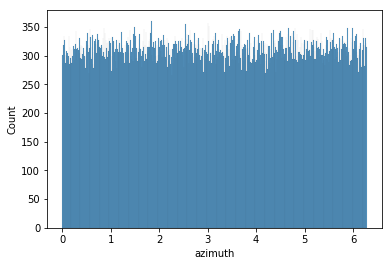

In [67]:
# let's look at the distribution of the targets
sns.histplot(train.azimuth, bins=640)

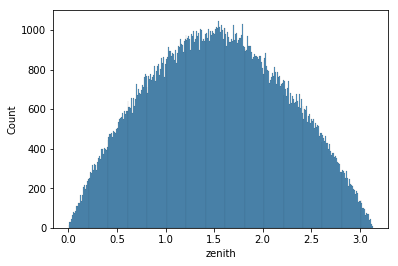

In [68]:
# let's look at the distribution of the targets
sns.histplot(train.zenith, bins=320)

we see that the azimuth is kimd of uniformly distributed between $ 0 -  2\pi$
while the zenith is from $ 0 - \pi $ with the peak at ~ 1.5 

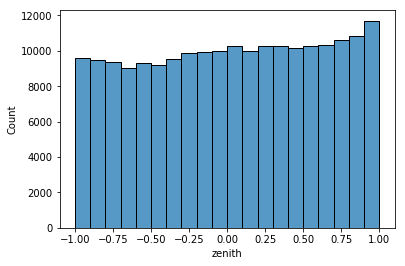

In [69]:
sns.histplot(np.cos(train.zenith), bins = 20)

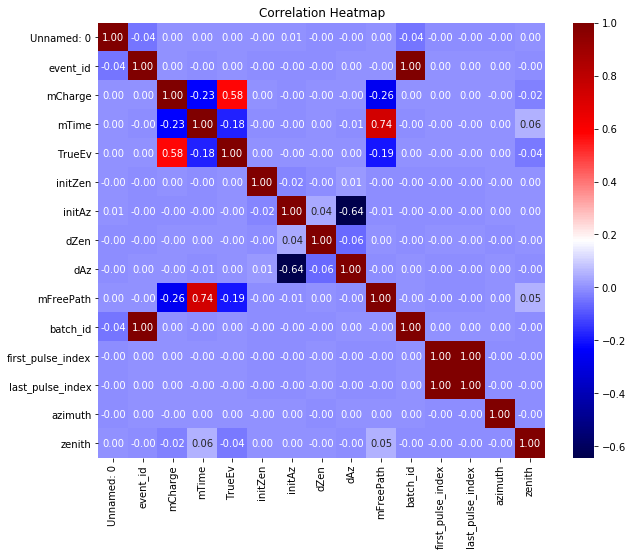

In [70]:
corr_matrix = train.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f',cmap='seismic')
plt.title("Correlation Heatmap")
plt.show()

Relation between the features and the targert variables

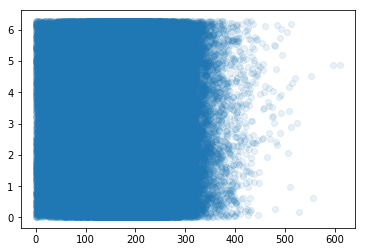

In [71]:
# relation between the target vars (itself)
plt.scatter(x  = train.mTime, y = train.azimuth, alpha = 0.1)

In [6]:
train_x = train.drop(['batch_id', 'event_id','first_pulse_index','last_pulse_index' ], axis =1 )


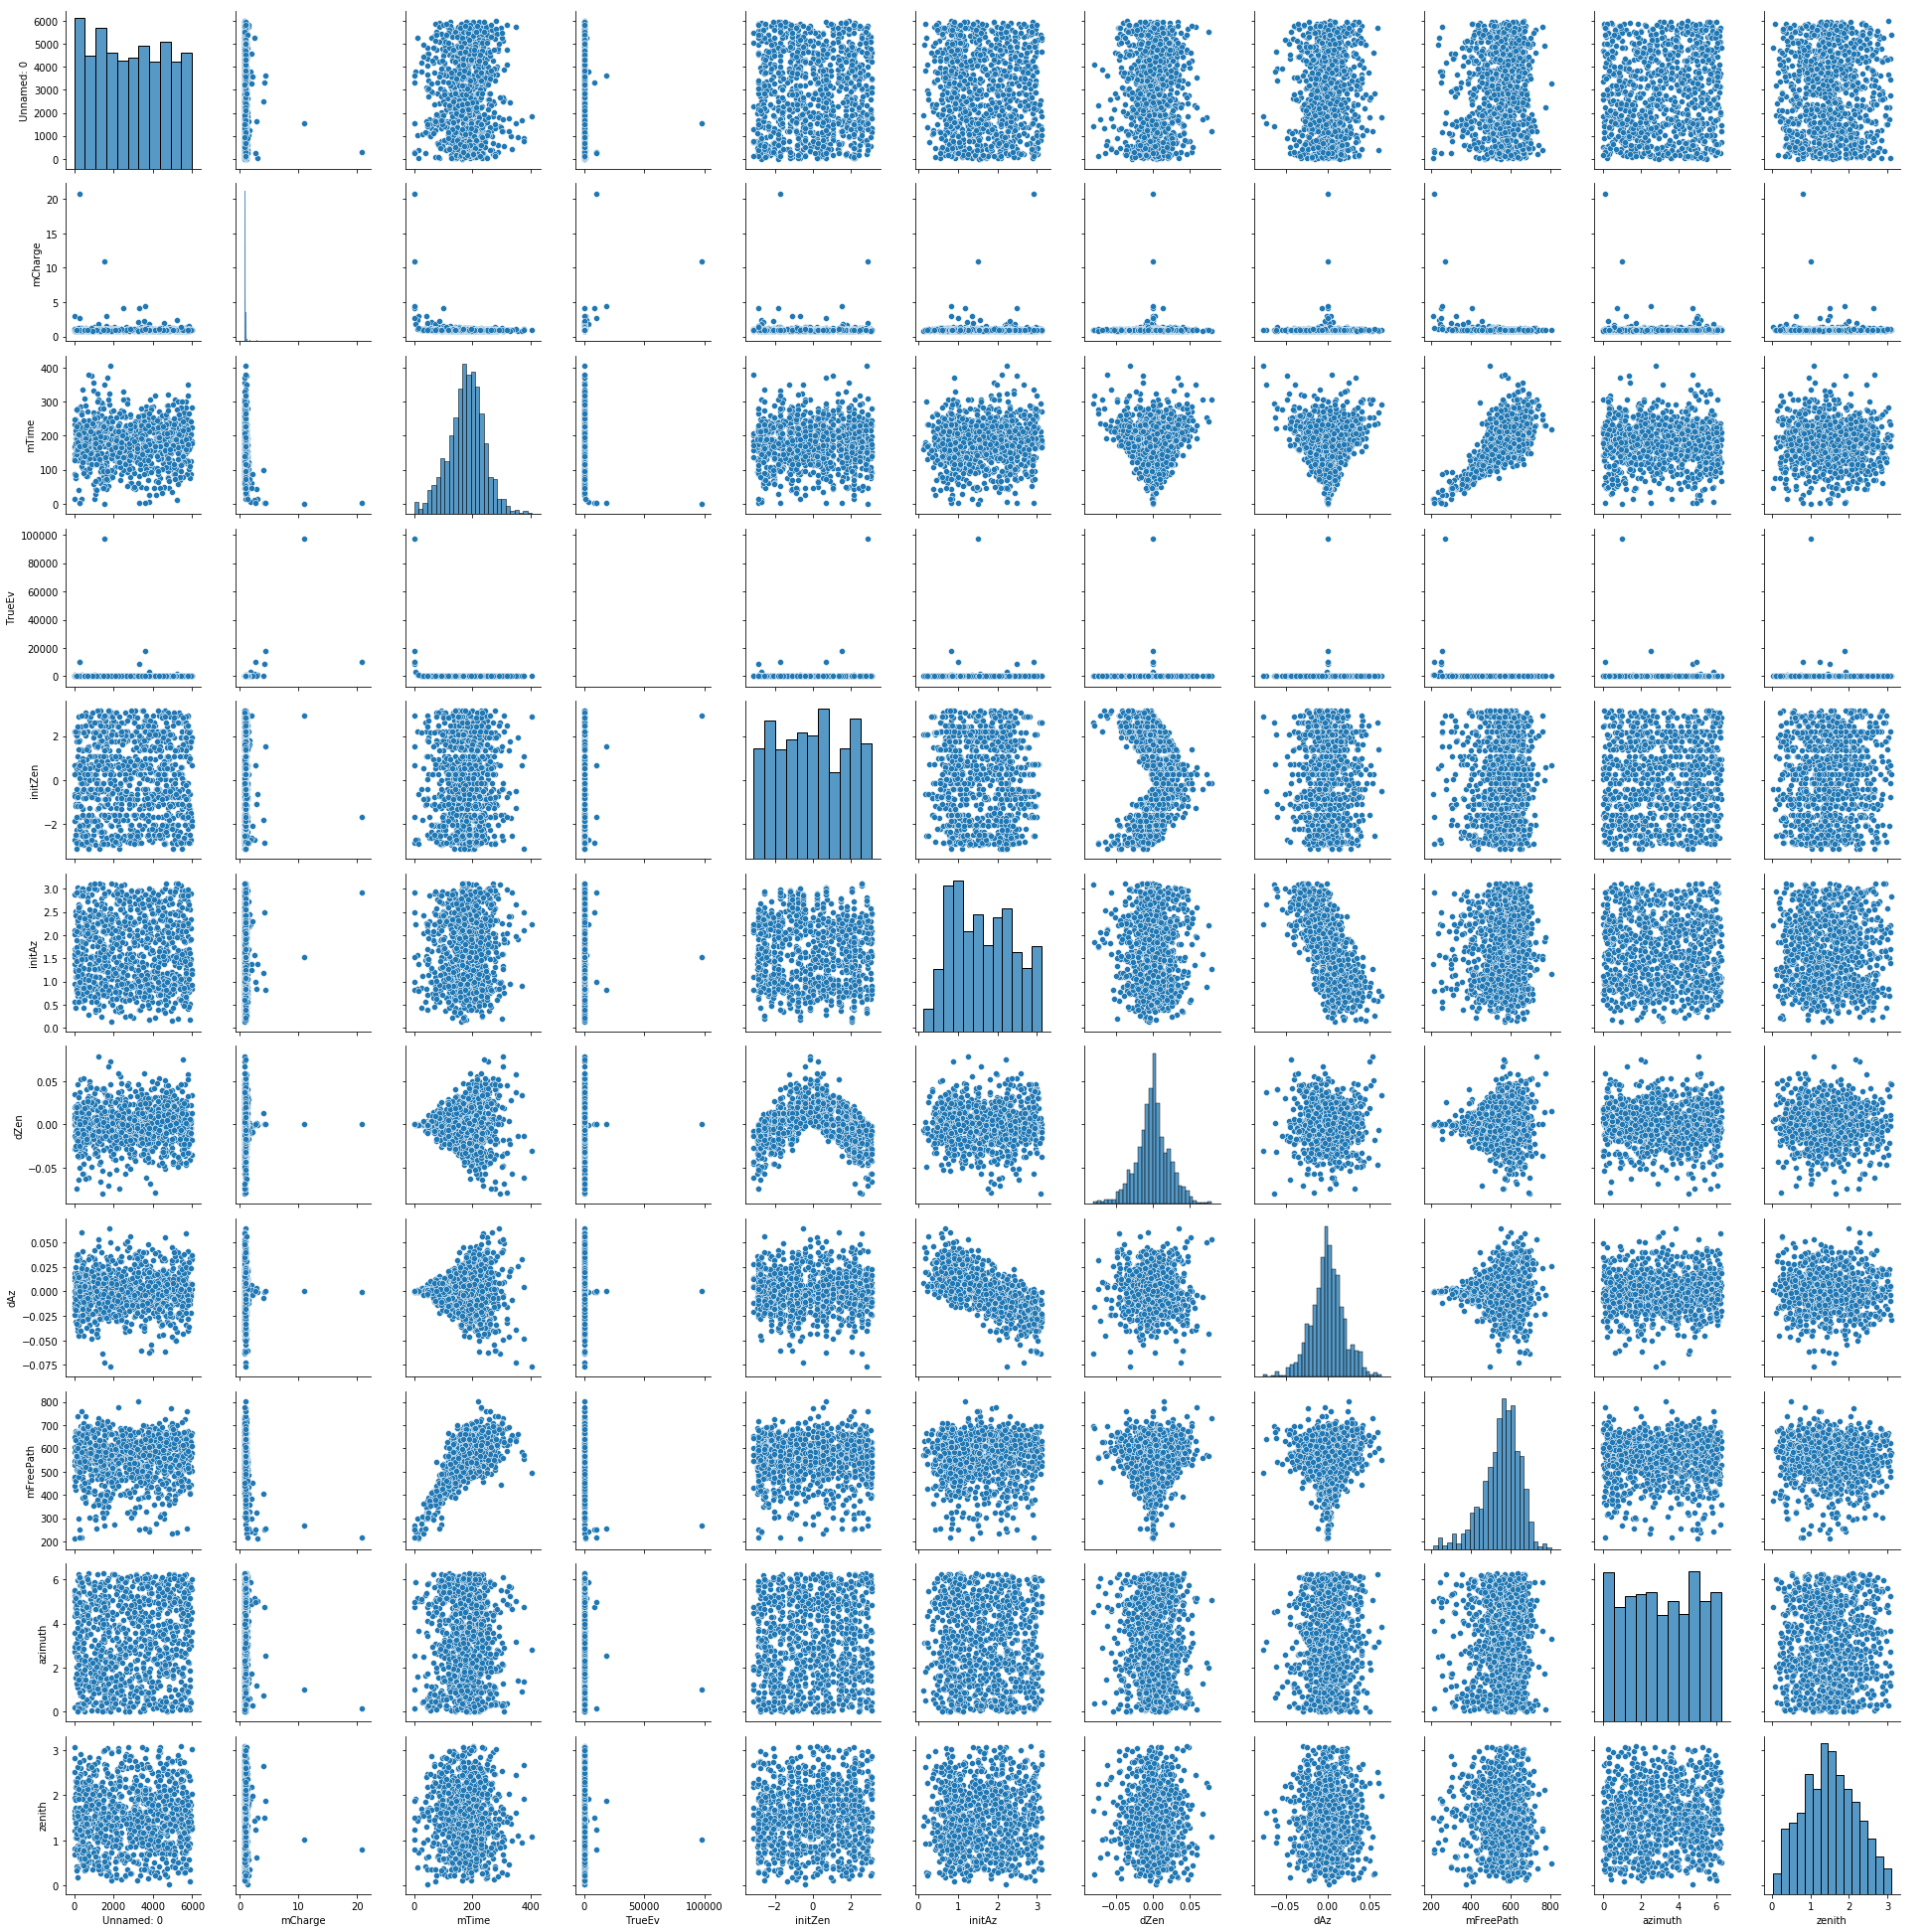

In [26]:
cols = ['mCharge', 'mTime', 'TrueEv', 'initZen',
       'initAz', 'dZen', 'dAz', 'mFreePath',  'azimuth', 'zenith']
sample_size = 1000

# Randomly sample from the DataFrame
random_sample = train_x.sample(n=sample_size, random_state=42)

# Plot the pairplot using the random sample
sns.pairplot(random_sample, height = 2.5)

#sns.pairplot(train_x[cols], )
plt.show()

In the above plots we see some outlers for truevents, mCharge ! (Let's) look at its boxplot.

#missing V

## OUTLIERS 
 -  True Events and avg Charge

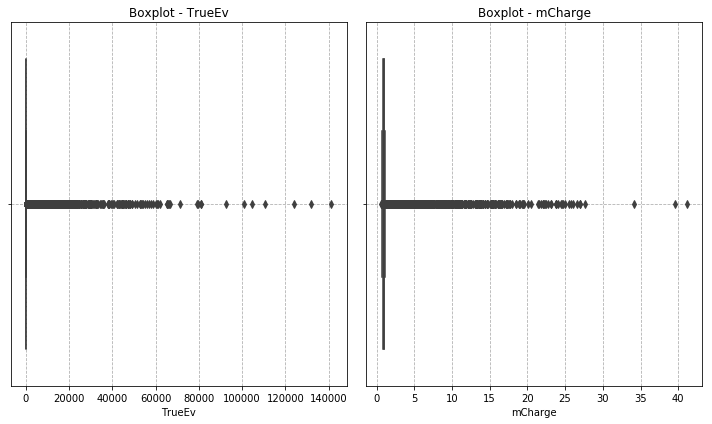

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
labels = ['TrueEv', 'mCharge']
# Plot the boxplot for the first column
for i,label in enumerate(labels):
#    print(i)
    sns.boxplot(x=train_x[label],ax = axes[i])
    axes[i].set_title('Boxplot - ' + label)
    axes[i].grid(linestyle= '--')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

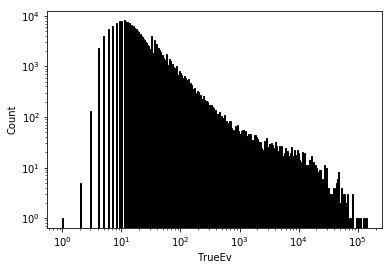

In [77]:
sns.histplot(train_x.TrueEv, log_scale=(True, True))

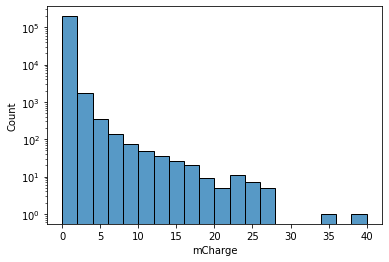

In [8]:
sns.histplot(train_x.mCharge, binrange=(0,40),log_scale = (False, True),bins = 20)

In [82]:
train_charge = train_x[train_x.mCharge > 5]
train_charge

Unnamed: 0    mCharge     mTime   TrueEv   initZen    initAz      dZen  \
221           221   7.164626  1.754118  12533.0  0.248101  2.683687  0.000080   
1113         1113   5.439558  4.051559   4837.0 -2.052299  0.795143 -0.000052   
1357         1357   5.602552  0.801927  27933.0  2.602833  0.668061 -0.000005   
1617         1617   7.895414  9.012792   2218.0  2.679264  1.221112 -0.000679   
1629         1629   6.386838  0.960176  23223.0 -0.856930  1.971151 -0.000019   
...           ...        ...       ...      ...       ...       ...       ...   
98379       98379  18.467318  1.329432  17883.0  0.688363  0.759016 -0.000029   
99419       99419   5.035667  1.494869  15617.0 -2.925808  1.531430 -0.000047   
99588       99588  23.183639  6.331790   3178.0 -2.095032  2.149575 -0.000519   
99745       99745   5.288778  2.077902  10582.0 -1.261191  1.357795  0.000099   
99871       99871   6.454352  0.772212  34822.0 -0.864117  2.236536  0.000034   

            dAz   mFreePath   azimuth    zenith  
221   -0.000018  166.361860  5.090162  0.493738  
1113   0.000051  198.604333  0.139079  1.643428  
1357   0.000022  277.749415  4.001578  1.195519  
1617  -0.000220  200.000743  2.100433  1.198135  
1629   0.000008  226.352787  1.692863  1.019349  
...         ...         ...       ...       ...  
98379  0.000037  211.912061  2.401297  0.828377  
99419  0.000065  268.131462  4.412095  0.318196  
99588 -0.000377  192.636925  3.287071  1.298648  
99745  0.000050  255.332739  0.265478  0.789022  
99871  0.000003  268.918723  1.891254  2.237518  

[523 rows x 11 columns]

In [83]:
train_TrueEv = train_x[train_x['TrueEv'] > 200]
train_TrueEv

Unnamed: 0   mCharge      mTime  TrueEv   initZen    initAz      dZen  \
36             36  0.926744  51.310023   306.0  1.330743  1.465627  0.002800   
162           162  1.581649  48.357333   288.0  3.058893  2.618510 -0.005853   
169           169  2.300263   2.675464  7633.0 -1.796027  2.193271  0.000162   
208           208  0.995765  25.964432   584.0 -0.157780  0.555736  0.000146   
220           220  1.045573  20.298227   848.0 -0.569066  1.602230 -0.000011   
...           ...       ...        ...     ...       ...       ...       ...   
99908       99908  1.075472  35.214511   269.0  0.367874  0.685178  0.004964   
99926       99926  2.065717  21.411957   849.0  0.102367  1.120350  0.002718   
99955       99955  0.986628  38.623333   263.0 -2.704366  1.895925 -0.005217   
99984       99984  1.087297  85.065041   250.0  0.264593  2.034616  0.007126   
99999       99999  1.141206  45.989924   297.0  3.132936  0.834157 -0.000660   

            dAz   mFreePath   azimuth    zenith  
36     0.003314  400.482411  4.812484  1.090342  
162   -0.000921  327.876138  6.254422  0.552461  
169    0.000048  244.833808  1.038328  1.831868  
208    0.001078  310.968644  2.961324  1.569604  
220   -0.000313  326.627066  3.379678  1.185998  
...         ...         ...       ...       ...  
99908  0.000322  299.478483  3.375289  1.337035  
99926 -0.000303  296.897704  2.515911  1.932879  
99955 -0.003914  244.494759  0.485040  1.115368  
99984  0.000437  425.670539  2.531710  1.611812  
99999  0.004271  368.326180  0.740898  1.725097  

[7540 rows x 11 columns]

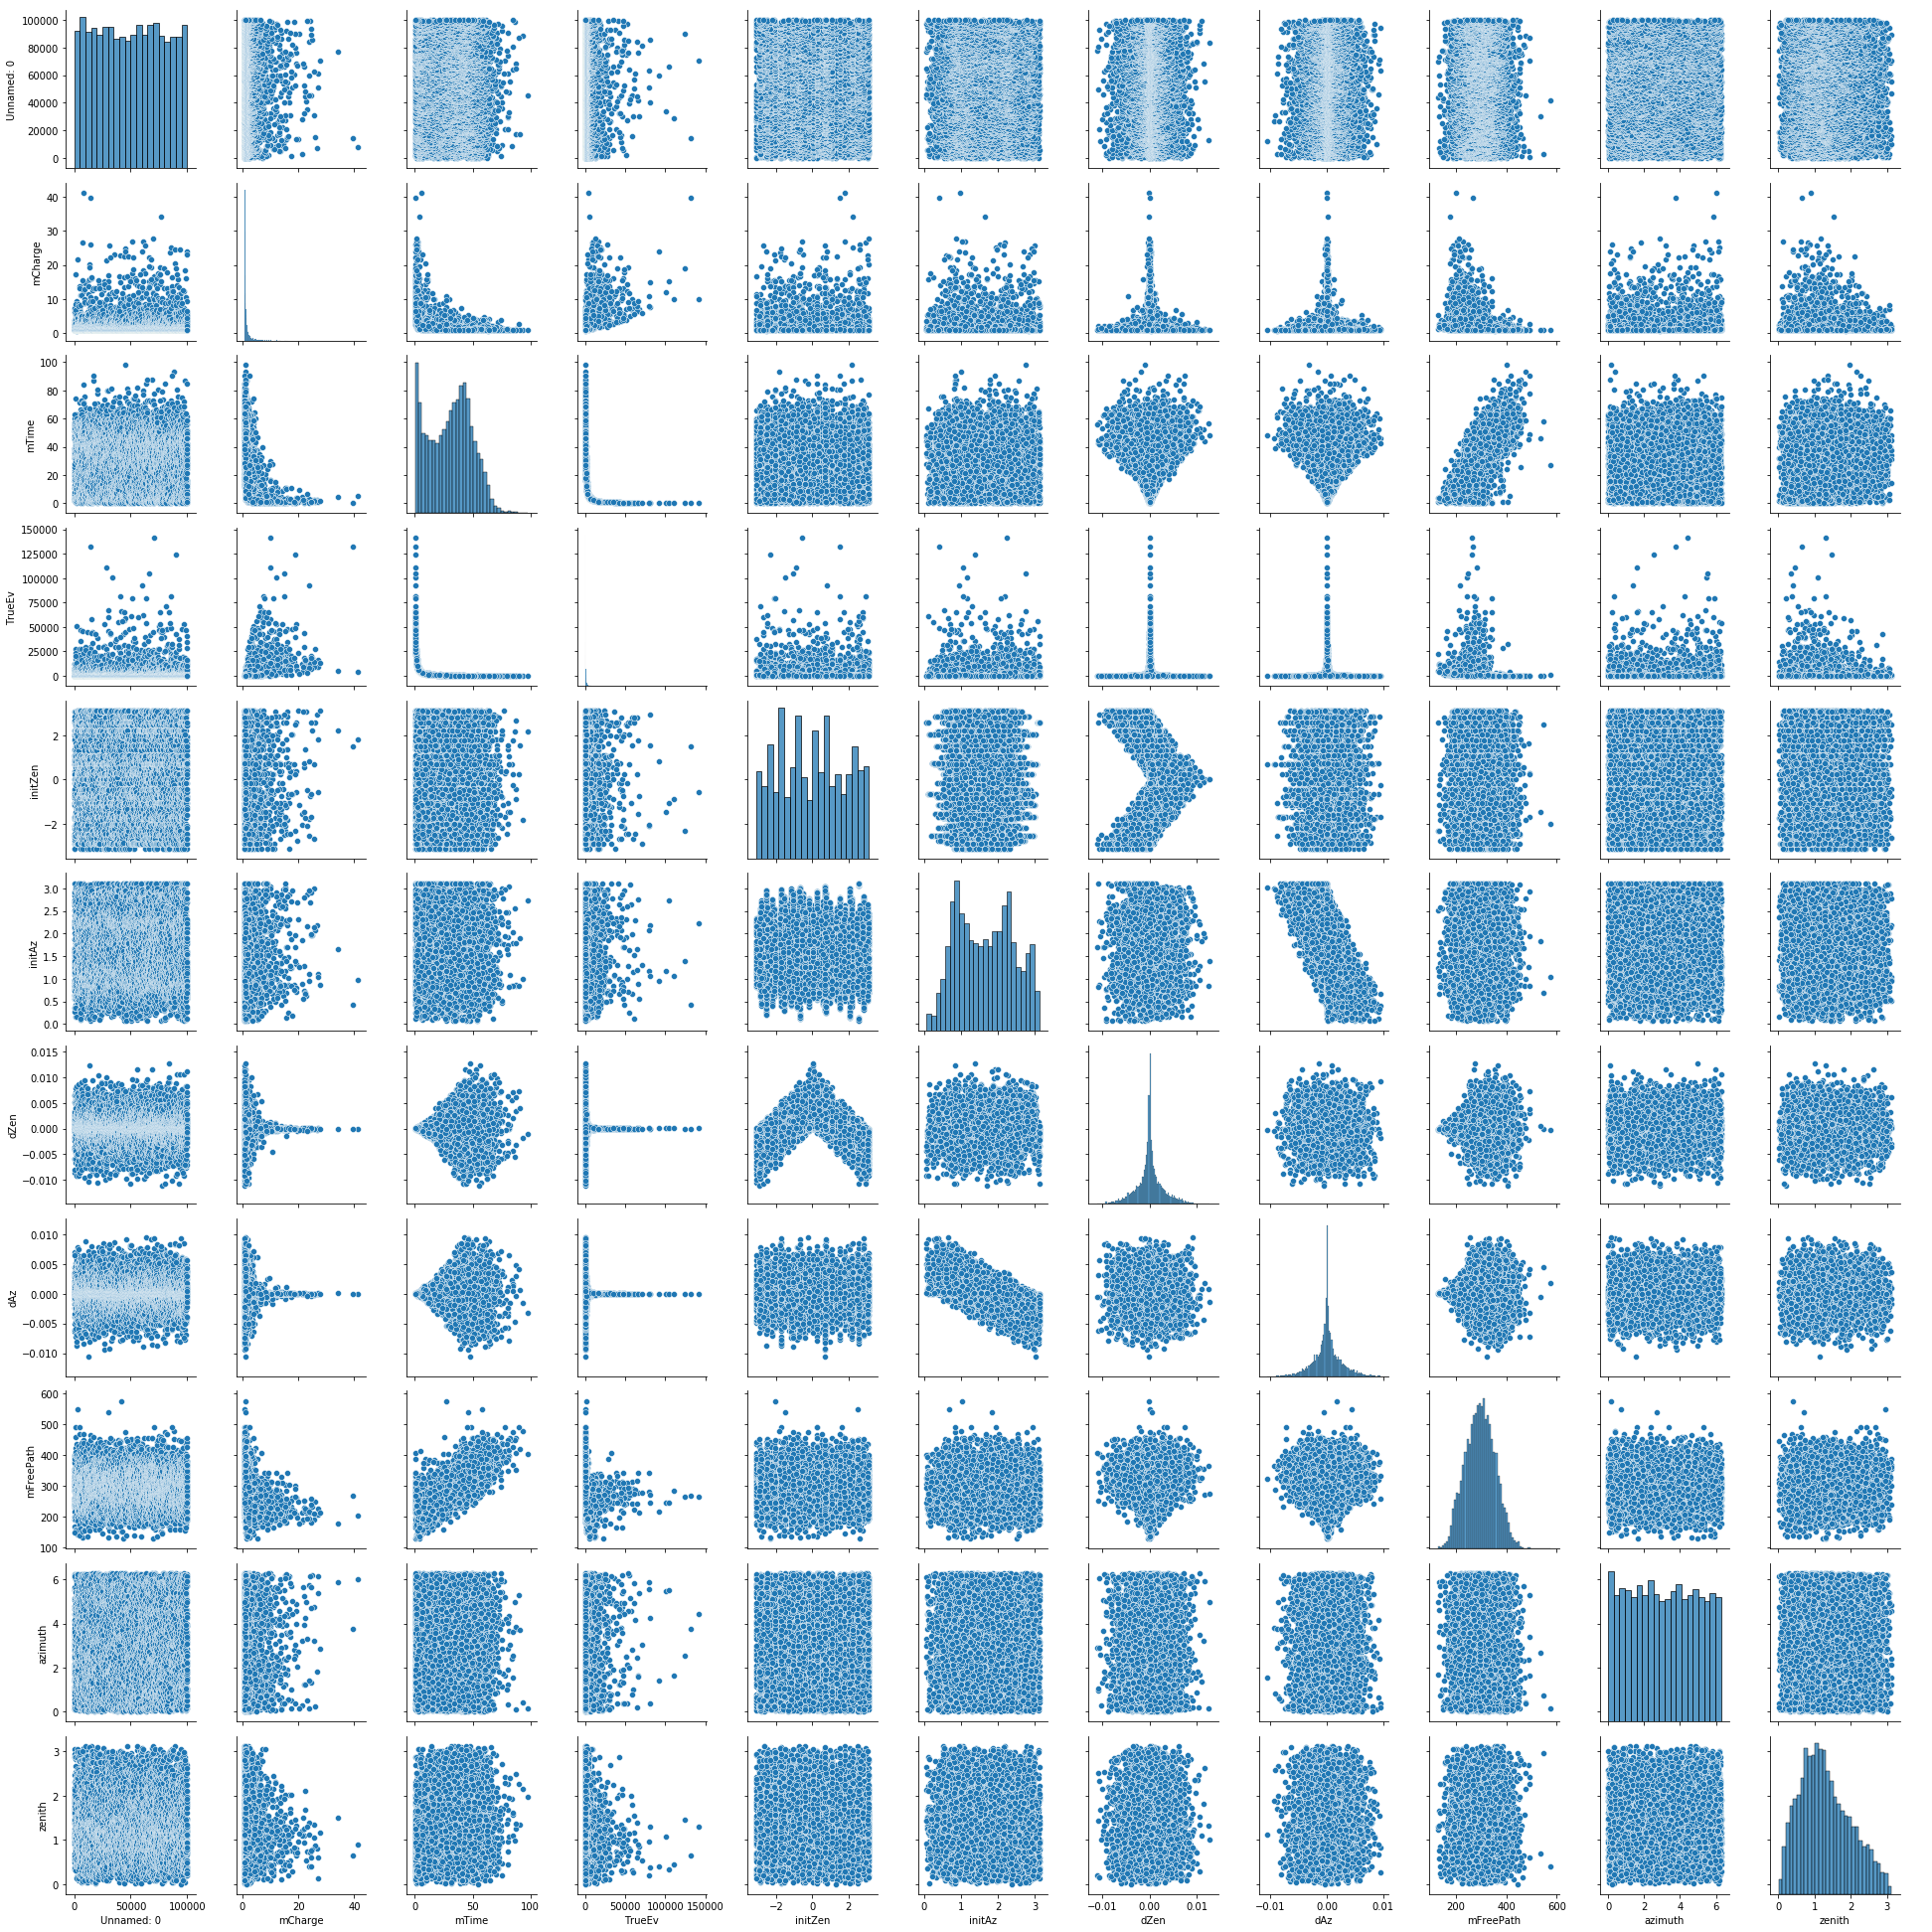

In [84]:
sns.pairplot(train_TrueEv, height= 2.5)

on the left plot we have the one where the true events > 200 on the right the entire sample space where 1000 points are chosen randomly. 
- dAz  on the (L) skewed towards left
- mFree Path (L) skewed towards L while the (R) one is towards Right
- mTime VS mFree path is 'more' straight for (L) compared to (R) where it is narrow in the beginning and the spreads up for higher mTime
- Zenith Histogram (L) is shifted towards Left while on (R) it is equally distributed 
- The scatter(R) between the initialAz and dAz is a straight line with negative slope and ofc a spread to it. Whilw (L) it loses the character
Otherwise (L) and (R)  are more or less same! 

### Summary :
The columns don't look like an outlier. 


In [16]:
duplicates = train[train.duplicated('event_id', keep=False)]
duplicates

Unnamed: 0    event_id   mCharge       mTime  TrueEv   initZen  \
3413         3413   878430661  0.939394  177.553846    21.0  0.248101   
3555         3555   875690833  0.914706  319.818182     8.0 -2.472032   
3577         3577   876878375  1.029687  283.096774     6.0 -2.472032   
3696         3696   875731555  0.946875  179.523810    28.0 -0.243179   
3749         3749   878050644  1.117760   14.116429  1424.0 -0.646659   
...           ...         ...       ...         ...     ...       ...   
98785       98785  1205064864  1.064241  203.730769    24.0  1.065710   
98937       98937  1207212120  0.933824  269.575758    10.0 -1.796027   
99697       99697   615738228  0.974194  105.308943    84.0  2.591975   
99899       99899   615512151  0.935227  206.139535     8.0 -0.864117   
99940       99940   615891794  0.938380  164.871429    25.0 -1.328075   

         initAz      dZen       dAz   mFreePath  batch_id  first_pulse_index  \
3413   0.802724  0.006773  0.009757  529.459045       270           26961045   
3555   0.989558 -0.049583  0.015183  655.715009       270             628996   
3577   2.112629 -0.022514 -0.033942  646.243013       270           12079617   
3696   0.651918  0.020893  0.019425  505.524249       270            1001615   
3749   0.872235 -0.000343  0.000797  252.145715       270           23177329   
...         ...       ...       ...         ...       ...                ...   
98785  0.645553  0.025554  0.024402  570.813895       371            6659392   
98937  0.684593 -0.039557  0.057382  531.195756       371           27659554   
99697  3.108472 -0.000488 -0.023703  380.576401       190            5748097   
99899  1.438474  0.038788  0.027228  664.708905       190            3444002   
99940  1.967164 -0.007033 -0.016194  602.041596       190            7158393   

       last_pulse_index   azimuth    zenith  
3413           26961110  0.955775  1.528872  
3555             629029  0.059761  2.149682  
3577           12079648  4.699228  1.045182  
3696            1001678  4.711538  2.771488  
3749           23178875  1.892475  0.740954  
...                 ...       ...       ...  
98785           6659470  3.584277  2.308945  
98937          27659587  2.887930  1.301765  
99697           5748220  2.600008  1.842091  
99899           3444045  6.281564  2.552091  
99940           7158463  2.186729  1.603782  

[186 rows x 15 columns]

In [21]:
#checking if these are really the duplicated 
x = train[train.event_id == 615738228]
x

Unnamed: 0   event_id   mCharge       mTime  TrueEv   initZen  \
70576       70576  615738228  0.974194  105.308943    84.0  2.591975   
99697       99697  615738228  0.974194  105.308943    84.0  2.591975   

         initAz      dZen       dAz   mFreePath  batch_id  first_pulse_index  \
70576  3.108472 -0.000488 -0.023703  380.576401       190            5748097   
99697  3.108472 -0.000488 -0.023703  380.576401       190            5748097   

       last_pulse_index   azimuth    zenith  
70576           5748220  2.600008  1.842091  
99697           5748220  2.600008  1.842091

In [3]:
#dropping duplicates
train = train.drop_duplicates('event_id')
train = train.drop(['event_id', 'batch_id'], axis = 1)
train

Unnamed: 0   mCharge       mTime   TrueEv   initZen    initAz      dZen  \
0              0  0.916463  106.278689     71.0 -2.894104  1.482011 -0.016698   
1              1  0.956522  220.822222     12.0  0.017752  1.636312  0.029178   
2              2  0.955612  217.791667     19.0 -0.864117  1.966697  0.035997   
3              3  1.076205  151.146341     38.0 -0.243179  1.062600  0.029708   
4              4  0.993462  185.125000     26.0 -2.704366  1.500928 -0.021463   
...          ...       ...         ...      ...       ...       ...       ...   
5995        5995  9.203173    0.610467  37664.0 -0.646659  2.265818  0.000044   
5996        5996  1.038158  225.410714     29.0 -2.704366  1.532145 -0.017379   
5997        5997  0.912500  185.847458      9.0  1.527428  2.328555  0.017026   
5998        5998  0.965426  232.717391     15.0 -1.077637  1.323116  0.034818   
5999        5999  2.209247   79.765517     99.0  2.602833  1.140572 -0.003797   

           dAz   mFreePath  first_pulse_index  last_pulse_index   azimuth  \
0    -0.005367  422.295872            1742861           1742983  5.780518   
1    -0.020427  622.805814           32613749          32613794  2.765109   
2     0.023031  633.803890           26711032          26711080  2.706114   
3    -0.000470  458.816575            6075896           6075978  4.280267   
4     0.011001  526.682326           32154961          32155025  4.633283   
...        ...         ...                ...               ...       ...   
5995 -0.000009  254.366919           11163248          11201119  5.230771   
5996  0.006746  491.962336           14688117          14688173  1.231305   
5997 -0.003418  511.509017           17965468          17965527  0.707635   
5998  0.021612  569.356796           28017291          28017337  2.888891   
5999  0.007502  402.017176           21566575          21566720  4.777992   

        zenith  
0     1.622565  
1     2.788138  
2     2.724042  
3     1.781559  
4     2.071044  
...        ...  
5995  0.286182  
5996  1.803992  
5997  1.262827  
5998  0.547332  
5999  1.621344  

[6000 rows x 13 columns]

## spitting dataset

In [3]:
X = train.drop(['zenith', 'azimuth'], axis = 1)
y = train[['zenith', 'azimuth']].values

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

# Modeling!

## importing models

In [ ]:
#pip install xgboost

In [11]:
from sklearn.metrics import mean_squared_error as mse

In [9]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [33]:
# Random Forest Regression model 
clf = MultiOutputRegressor(RandomForestRegressor(max_depth=8, random_state=42, ))
clf.fit(X_train, y_train) #trainign the model
pred = clf.predict(X_val) # prediction

Text(0, 0.5, 'Predicted')

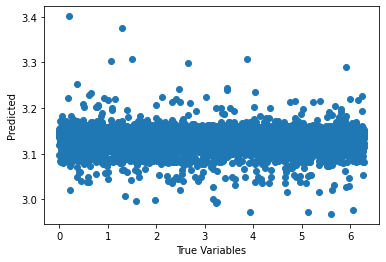

In [42]:
#let's plot the pred 
plt.scatter(x = y_val[:,1], y = pred[:,1])
plt.xlabel('True Variables')
plt.ylabel('Predicted')

Doesn't seem like a good fit.Could try with the gradient boost regressor

## XGB Regressor

In [12]:
xgb = XGBRegressor(n_estimators=1000, max_depth = 7)
wrapper = MultiOutputRegressor(xgb)
wrapper.fit(X_train, y_train)
y_pred_xbg = wrapper.predict(X_val)

Text(0, 0.5, 'Predicted')

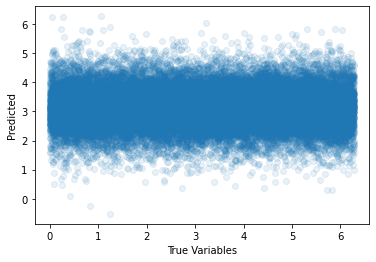

In [15]:
#let's plot the pred 
plt.scatter(x = y_val[:,1], y = y_pred_xbg[:,1], alpha = 0.1)
plt.xlabel('True Variables')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

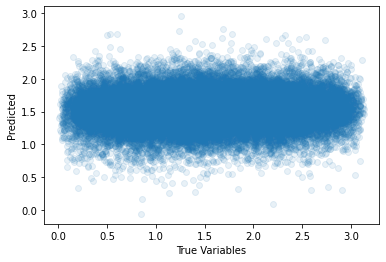

In [16]:
#let's plot the pred 
plt.scatter(x = y_val[:,0], y = y_pred_xbg[:,0], alpha = 0.1)
plt.xlabel('True Variables')
plt.ylabel('Predicted')

In [22]:
print(f'RMSE zenith estimation: {mse(y_val[:,0], y_pred_xbg[:,0]): .3f}')
print(f'RMSE azimuth estimation: {mse(y_val[:,1], y_pred_xbg[:,1]):.3f}')

RMSE zenith estimation:  0.524
RMSE azimuth estimation: 3.686


how would things change if we train both the targets seprately snd then see


In [24]:
xgb.fit(X_train, y_train[:,0])
y_predxgb0 = xgb.predict(X_val)

In [27]:
xgb.fit(X_train, y_train[:,1])
y_predxgb1 = xgb.predict(X_val)

In [28]:
print(f'RMSE zenith estimation: {mse(y_val[:,0],y_predxgb0): .3f}')
print(f'RMSE azimuth estimation: {mse(y_val[:,1], y_predxgb1):.3f}')

RMSE zenith estimation:  0.524
RMSE azimuth estimation: 3.686


### Tuning the parameter
- chekcing the xgb regressor with the list of the parameters and see if the result improves

It gives the same results!


## using tensorfow neural network

In [8]:
import tensorflow as tf

In [11]:
n_feature = X_train.shape[1]

(159925, 13)

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
# Assume X_train and y_train are the training features and labels respectively

# Create a sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add output layer
model.add(Dense(2))  # Assuming a single output for regression = 1

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_val, y_val)
print('Mean Squared Error:', loss)

# Make predictions
y_pred = model.predict(X_val)


Epoch 1/10
5000/5000 [==============================] - 18s 3ms/step - loss: 913208.1875
Epoch 2/10
5000/5000 [==============================] - 18s 4ms/step - loss: 90580.8672
Epoch 3/10
5000/5000 [==============================] - 17s 3ms/step - loss: 3698.0349
Epoch 4/10
5000/5000 [==============================] - 18s 4ms/step - loss: 66.7835
Epoch 5/10
5000/5000 [==============================] - 22s 4ms/step - loss: 6.0349
Epoch 6/10
5000/5000 [==============================] - 21s 4ms/step - loss: 1.0728
Epoch 7/10
5000/5000 [==============================] - 20s 4ms/step - loss: 1.0729
Epoch 8/10
5000/5000 [==============================] - 19s 4ms/step - loss: 1.0731
Epoch 9/10
5000/5000 [==============================] - 20s 4ms/step - loss: 1.0732
Epoch 10/10
1250/1250 [==============================] - 5s 3ms/step - loss: 1.0734
Mean Squared Error: 1.0733704566955566
1250/1250 [==============================] - 4s 3ms/step


In [55]:
y_pred.shape

(40000, 2)

In [57]:
y_pred

array([[1.5156541, 3.2929602],
       [1.5156541, 3.2929602],
       [1.5156541, 3.2929602],
       ...,
       [1.5156541, 3.2929602],
       [1.5156543, 3.2929604],
       [1.5156543, 3.2929604]], dtype=float32)

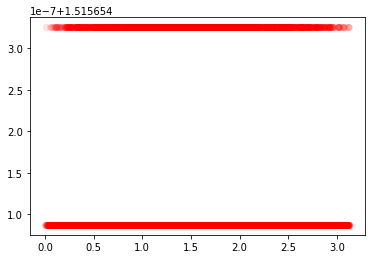

In [56]:
plt.scatter(x = y_val[:,0],y= y_pred[:,0], alpha = 0.1, c = 'red')
#plt.ylim(2.33, 2.345)

## pytorch

In [6]:
import torch 

ModuleNotFoundError: No module named 'torch'

In [ ]:
#! pip install torch

In [5]:
import torch

In [6]:
from torch.autograd import Variable
import torch.nn as nn


In [13]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

In [16]:
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

epoch 0, loss 81.75194549560547
epoch 50, loss 4.516007423400879
epoch 100, loss 3.051654815673828
epoch 150, loss 2.0621304512023926
epoch 200, loss 1.3934684991836548
epoch 250, loss 0.9416249394416809
epoch 300, loss 0.636295735836029
epoch 350, loss 0.42997241020202637
epoch 400, loss 0.29055067896842957
epoch 450, loss 0.19633673131465912
epoch 500, loss 0.1326727271080017
epoch 550, loss 0.08965229243040085
epoch 600, loss 0.06058228388428688
epoch 650, loss 0.04093797132372856
epoch 700, loss 0.027663517743349075
epoch 750, loss 0.01869349740445614
epoch 800, loss 0.012632003985345364
epoch 850, loss 0.008535998873412609
epoch 900, loss 0.00576803321018815
epoch 950, loss 0.0038977109361439943
epoch 1000, loss 0.0026337241288274527


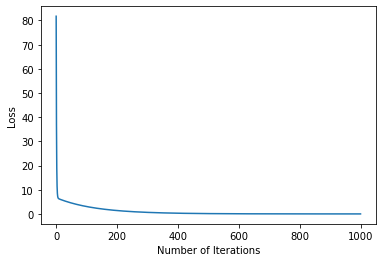

In [15]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

#define model 
input_dim = 1
#output_dim = 1
model  = LinearRegression(input_dim, output_dim)

mse = nn.MSELoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

loss_list = []
iteration_number = 1001

for iteration in range(iteration_number):

    #optimizer
    optimizer.zero_grad()

    # forwrard to get output
    results = model(car_price_tensor)

    loss = mse(results, number_of_car_sell_tensor) #calculate the loss

    loss.backward() #calculating gradients
    optimizer.step() #updte the step 

    #store loss
    loss_list.append(loss.data)

    #print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()


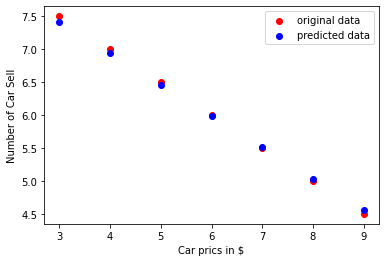

In [17]:
#prediction of car price

predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = 'original data', c = 'red')
plt.scatter(car_prices_array, predicted, label ='predicted data', c = 'blue')
plt.legend()
plt.xlabel('Car prics in $')
plt.ylabel('Number of Car Sell')
plt.show()

In [10]:
#using ANN Model


import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [6]:
train.shape

(6000, 15)

- creating a three layered 
- for regression we 

In [4]:
features_numpy = train.drop(['azimuth', 'zenith'], axis = 1).values
targets_numpy = train[['azimuth', 'zenith']].values

In [5]:
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 


In [13]:
#converting to tensor 
featuresTrain = torch.from_numpy(features_train).type(torch.FloatTensor)
targetsTrain = torch.from_numpy(targets_train).type(torch.FloatTensor)
featuresTest = torch.from_numpy(features_test).type(torch.FloatTensor)
targetsTest = torch.from_numpy(targets_test).type(torch.FloatTensor)

to create the dataset within pytorch framework - designed to handle the data that is already in the memory.

In [15]:
# pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain) 
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)


In [8]:
n_iteration = 1000
batch_size = 100
num_epoch = int(n_iteration/(len(features_train)/batch_size))
display(num_epoch)

20

By iterating over the dataloader, we can access mini-batches of data, which can be processed and used for trained

In [16]:
# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the ANN model
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.fc2(out)
        return out

# Define the hyperparameters
input_size = 13
hidden_size = 64
output_size = 2
learning_rate = 0.001
num_epochs = 100

X_array = X.to_numpy()
#y_array = y.to_numpy()

# Convert numpy arrays to tensors
X_tensor = torch.tensor(X_array, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Create the model
model = ANN(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print the loss for every few epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Make predictions
predictions = model(X_tensor)


Epoch [10/100], Loss: nan
Epoch [20/100], Loss: nan
Epoch [30/100], Loss: nan
Epoch [40/100], Loss: nan
Epoch [50/100], Loss: nan
Epoch [60/100], Loss: nan
Epoch [70/100], Loss: nan
Epoch [80/100], Loss: nan
Epoch [90/100], Loss: nan
Epoch [100/100], Loss: nan


In [29]:
predictions

tensor([[-281699.9062,  328488.0625],
        [ -48043.9102, -127955.9453],
        [ 130444.0938, -118227.9453],
        ...,
        [ 182860.0938,  -30635.9414],
        [  90952.0938, -120843.9453],
        [ 285988.0938, -110207.9453]], grad_fn=<AddmmBackward0>)

In [10]:
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, output_dim) 
        # Non-linearity 1
    #    self.relu1 = nn.ReLU()
        
    #    # Linear function 2: 150 --> 150
    #    self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    #    # Non-linearity 2
    #    self.tanh2 = nn.Tanh()
    #    
    #    # Linear function 3: 150 --> 150
    #    self.fc3 = nn.Linear(hidden_dim, hidden_dim)
    #    # Non-linearity 3
    #    self.elu3 = nn.ELU()
    #    
    #    # Linear function 4 (readout): 150 --> 10
    #    self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
    #    print(out.shape)
    #    # Non-linearity 1
    #    out = self.relu1(out)
    #    print(out.shape)
    #    
    #    # Linear function 2
    #    out = self.fc2(out)
    #    print(out.shape)
    #    
    #    # Non-linearity 2
    #    out = self.tanh2(out)
    #    print(out.shape)
    #    
    #    # Linear function 2
    #    out = self.fc3(out)
    #    print(out.shape)
    #    # Non-linearity 2
    #    out = self.elu3(out)
    #    print(out.shape)
    #    
    #    # Linear function 4 (readout)
    #    out = self.fc4(out)
        return out


In [11]:
#instantiating the model 

input_dim = 13
output_dim = 2

hidden_dim = 10 

model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.MSELoss()

learning_rate = 0.02

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [17]:
# ANN Model Training
count = 0 
loss_list = []
iteration_list = []
for epoch in range(num_epoch):
    for i , (x, y) in enumerate(train_loader):
        #define variabel
        train = Variable(x.view(-1, 13))
        y = Variable(y)
       # display(y.shape)

        # Clear gradients
        optimizer.zero_grad()

        #forward propagation
        outputs = model(train)

        #calcaulte the mse 
        loss = error(outputs, y)

        #caclulate gradients 
        loss.backward()

        # update parameters 
        optimizer.step()
        
        count +=1 

        if count % 50 == 0 :
            loss_list.append(loss.data)
            iteration_list.append(count)

        if count % 100 == 0 :
            print(f'Iteration {count} Loss: {loss.data}')

Iteration 100 Loss: nan
Iteration 200 Loss: nan
Iteration 300 Loss: nan
Iteration 400 Loss: nan
Iteration 500 Loss: nan
Iteration 600 Loss: nan
Iteration 700 Loss: nan
Iteration 800 Loss: nan
Iteration 900 Loss: nan


In [ ]:

loss_list = []
iteration_number = 1001

for iteration in range(iteration_number):

    #optimizer
    optimizer.zero_grad()

    # forwrard to get output
    results = model(car_price_tensor)

    loss = mse(results, number_of_car_sell_tensor) #calculate the loss

    loss.backward() #calculating gradients
    optimizer.step() #updte the step 

    #store loss
    loss_list.append(loss.data)

    #print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()


In [ ]:
# ANN Model Training

count = 0 
loss_list = []
iteration_list = []


# traininf neural network using pytorch

In [7]:
#creating tensors
X_train = torch.FloatTensor(X_train.values)
X_val = torch.FloatTensor(X_val.values)
y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)

In [8]:
X_train

tensor([[3.8970e+03, 2.1563e+08, 1.0331e+00,  ..., 6.7000e+01, 8.3892e+06,
         8.3893e+06],
        [5.6280e+03, 1.5662e+09, 9.4745e-01,  ..., 4.8200e+02, 4.9935e+06,
         4.9935e+06],
        [1.7560e+03, 1.4471e+09, 9.5952e-01,  ..., 4.4500e+02, 1.8048e+07,
         1.8048e+07],
        ...,
        [5.2260e+03, 1.2717e+09, 9.0318e-01,  ..., 3.9100e+02, 2.1611e+07,
         2.1612e+07],
        [5.3900e+03, 6.7972e+07, 9.5931e-01,  ..., 2.1000e+01, 2.9280e+07,
         2.9280e+07],
        [8.6000e+02, 1.4163e+09, 9.8071e-01,  ..., 4.3600e+02, 3.2731e+06,
         3.2731e+06]])

In [12]:
# create ANN model 
class ANN_model(nn.Module):
    def __inti__(self, input_dim, output_dim):
        super(ANN_model, self).__init__()
        self.fc1 = nn.Linear(input_dim, 20)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(20, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out
    

inp_dim = 10
out_dim = 2
model = ANN_model(input_dim = 10, output_dim = 2)

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

TypeError: ANN_model.__init__() got an unexpected keyword argument 'input_dim'